In [40]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [41]:
# функция возвращает список друзей
def get_friends_ids(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        #print json_response.get('error')
        return list()
    return json_response[u'response']


In [42]:
graph = {}
friend_ids = get_friends_ids(11744372)  # ваш user id, для которого вы хотите построить граф друзей.
for friend_id in friend_ids:
    
        
    graph[friend_id] = get_friends_ids(friend_id)
    print ('Processing id: ', friend_id, len(graph[friend_id]) )

('Processing id: ', 427279, 384)
('Processing id: ', 439704, 437)
('Processing id: ', 441753, 253)
('Processing id: ', 831411, 227)
('Processing id: ', 1094860, 203)
('Processing id: ', 1199779, 126)
('Processing id: ', 1321155, 341)
('Processing id: ', 1553946, 364)
('Processing id: ', 1603471, 345)
('Processing id: ', 1721325, 419)
('Processing id: ', 2013657, 1071)
('Processing id: ', 2236009, 772)
('Processing id: ', 2354024, 429)
('Processing id: ', 2399072, 135)
('Processing id: ', 2433853, 518)
('Processing id: ', 2518343, 1265)
('Processing id: ', 2600491, 567)
('Processing id: ', 2986419, 437)
('Processing id: ', 3697870, 260)
('Processing id: ', 4015282, 454)
('Processing id: ', 4090160, 330)
('Processing id: ', 4130957, 0)
('Processing id: ', 4552252, 536)
('Processing id: ', 4597703, 263)
('Processing id: ', 4784259, 183)
('Processing id: ', 4896629, 383)
('Processing id: ', 5151005, 214)
('Processing id: ', 5205396, 542)
('Processing id: ', 5330701, 216)
('Processing id: '

In [43]:
g = networkx.Graph(directed=False)

In [44]:
# соединяем друзей дружащих друг с другом
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

In [45]:
# сохраняем
networkx.write_gml(g, "network.gml")

# считаем из файла потому что можем

In [48]:

G = nx.read_gml('network.gml')

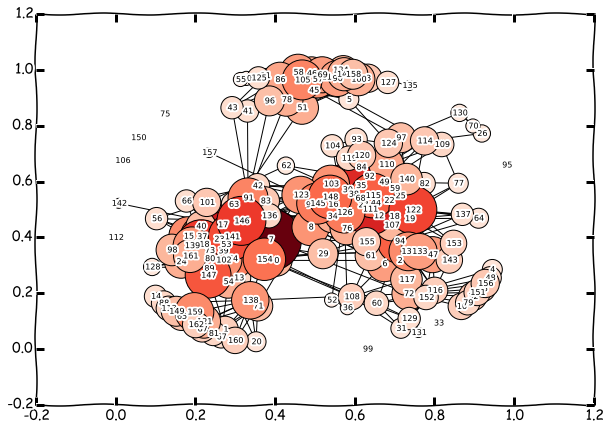

In [49]:

plt.xkcd()
k = nx.degree(G)

plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*100 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 with_labels=True
                 )

In [50]:
def print_info_about(id_interest):  
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}'.format(id_interest)).json()[u'response']
    print resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()

In [52]:
# узнаем кто под 7 номером на графе!
nom=7
print_info_about(G.node[nom]['label'])

Женя Цымбалов
